# **Conception d'une application au service de la santé publique**
___

Lien vers les consignes du projet sur openclassrooms : https://openclassrooms.com/fr/projects/628/assignment

description du jeu de données : https://world.openfoodfacts.org/data/data-fields.txt

**Contexte et  mission**
- L'Agence nationale de santé publique en France, *Santé publique France* souhaite trouver des idées innovantes d’applications en lien avec l'alimentation. Elle fait un appel à projet.  

- Ma mission: trouver une idée d'application et estimer la faisabilité d'exploiter la base de données de l’organisme <i>“Open Food Facts”</i>, contenant des informations sur plus d'1 millions d'aliments pour la réalisation de cette application. 

**Idée d'application**

- *Cible* : les produits vendus en France.
- *Prédiction du nutri-score pour tous les produits n'ayant pas cette information renseignées* : L’apposition du Nutri-Score sur les produits est facultative. De nombreux entreprises et distributeurs choisissent de ne pas l’afficher, mais les valeurs nutritionnelles sont obligatoires. Par un simple scan du code-barre d'un produit sans nutri-score apposé, l'application devra prédire son nutri-score. La définition et les explication sur le calcul du nutri-score sont disponibles [ici](https://www.mangerbouger.fr/Manger-mieux/Comment-manger-mieux/Comment-comprendre-les-informations-nutritionnelles/Qu-est-ce-que-le-Nutri-Score/?gclid=CjwKCAjwgISIBhBfEiwALE19SYBlKJgBeeSjxAW7m_Nu6g2feuwqkroK5yzhrx808L7QSwTCEI_27BoCKcMQAvD_BwE&gclsrc=aw.ds#xtor=SEC-106)
     

Cette étude est organisée en 2 notebooks: 
- Notebook de nettoyage
- Notebook d'analyse

# Notebook de nettoyage

## 0. MISE EN PLACE

 Nous commençons par mettre en place notre cadre de travail en effectuant les actions suivantes :
 - Importation des librairies et packages Python nécessaires
 - Importation des fonctions utiles implémentées 
 - Chargement du jeu de données

___
### 0.1 Importation des librairies Python nécessaires

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

___
### 0.2 Importation des fonctions utiles

Par soucis de clarté (lisibilité) et afin d'assurer un meilleur confort de lecture de ce notebook, les fonctions implémentées pour la manipulation des données et la réalisation des graphiques ont été regroupées dans le fichier project_functions.py.

Ces fonctions sont importées via la ligne de code ci-dessous:

In [2]:
import project_functions as pf

___
### 0.3 Chargement du jeu de données
On remarque lors du téléchargement que le jeu de données est assez important (environ 4Gb). Le chargement prends du temps

In [3]:
food_data = pd.read_csv('../DataSet/en.openfoodfacts.org.products.csv', sep='\t', encoding='UTF-8')

## 1. DESCRIPTION DU JEU DE DONNEES

In [4]:
food_data.head() #Affiche le contenu des 5 premières lignes du fichier

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,...,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1623855209,2021-06-16T14:53:29Z,jeunes pousses,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1561463718,2019-06-25T11:55:18Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,000000000003327986,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1574175736,2019-11-19T15:02:16Z,1624390765,2021-06-22T19:39:25Z,Filetes de pollo empanado,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000004622327,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1619501895,2021-04-27T05:38:15Z,1619501897,2021-04-27T05:38:17Z,Hamburguesas de ternera 100%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
food_data.shape #Affiche le nombre de lignes et de colonnes du fichier

(1877241, 186)

In [6]:
food_data.columns #Affiche la liste des colonnes du fichier

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'abbreviated_product_name', 'generic_name',
       ...
       'carbon-footprint-from-meat-or-fish_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g',
       'choline_100g', 'phylloquinone_100g', 'beta-glucan_100g',
       'inositol_100g', 'carnitine_100g'],
      dtype='object', length=186)

**Observations**
- Taille : **1.877.241 lignes, 186 colonnes**
- Beaucoup de NAN

## 2. PRE-SELECTION DES DONNEES PERTINENTES

- Restriction des données aux produits vendus en France
- Suppression des colonnes non pertinentes
- Sélection des colonnes restantes en fonction du taux de remplissage

### 2.1 Restriction des données aux produits vendus en France

In [7]:
data = food_data[food_data["countries_tags"].str.contains('france', regex=True)==True]

In [8]:
data.shape

(820915, 186)

### 2.2 Sélection des colonnes

___
#### 2.2.1 Suppression des colonnes non pertinentes
Certaines colonnes sont à vu d'oeil non pertinentes pour notre application. Elles sont supprimées. Il s'agit par exemple de celles contenant les urls des images des produits ainsi que les stamps de datetime

In [9]:
data = data.drop(columns=['created_datetime', 'created_t', 'url', 'last_modified_t',
                          'creator','last_modified_datetime', 'image_url', 
                          'image_small_url','image_ingredients_small_url', 
                          'image_ingredients_url', 'image_nutrition_url', 
                          'image_nutrition_small_url'])

___
#### 2.2.2 Visualisation du taux de remplissage par colonne

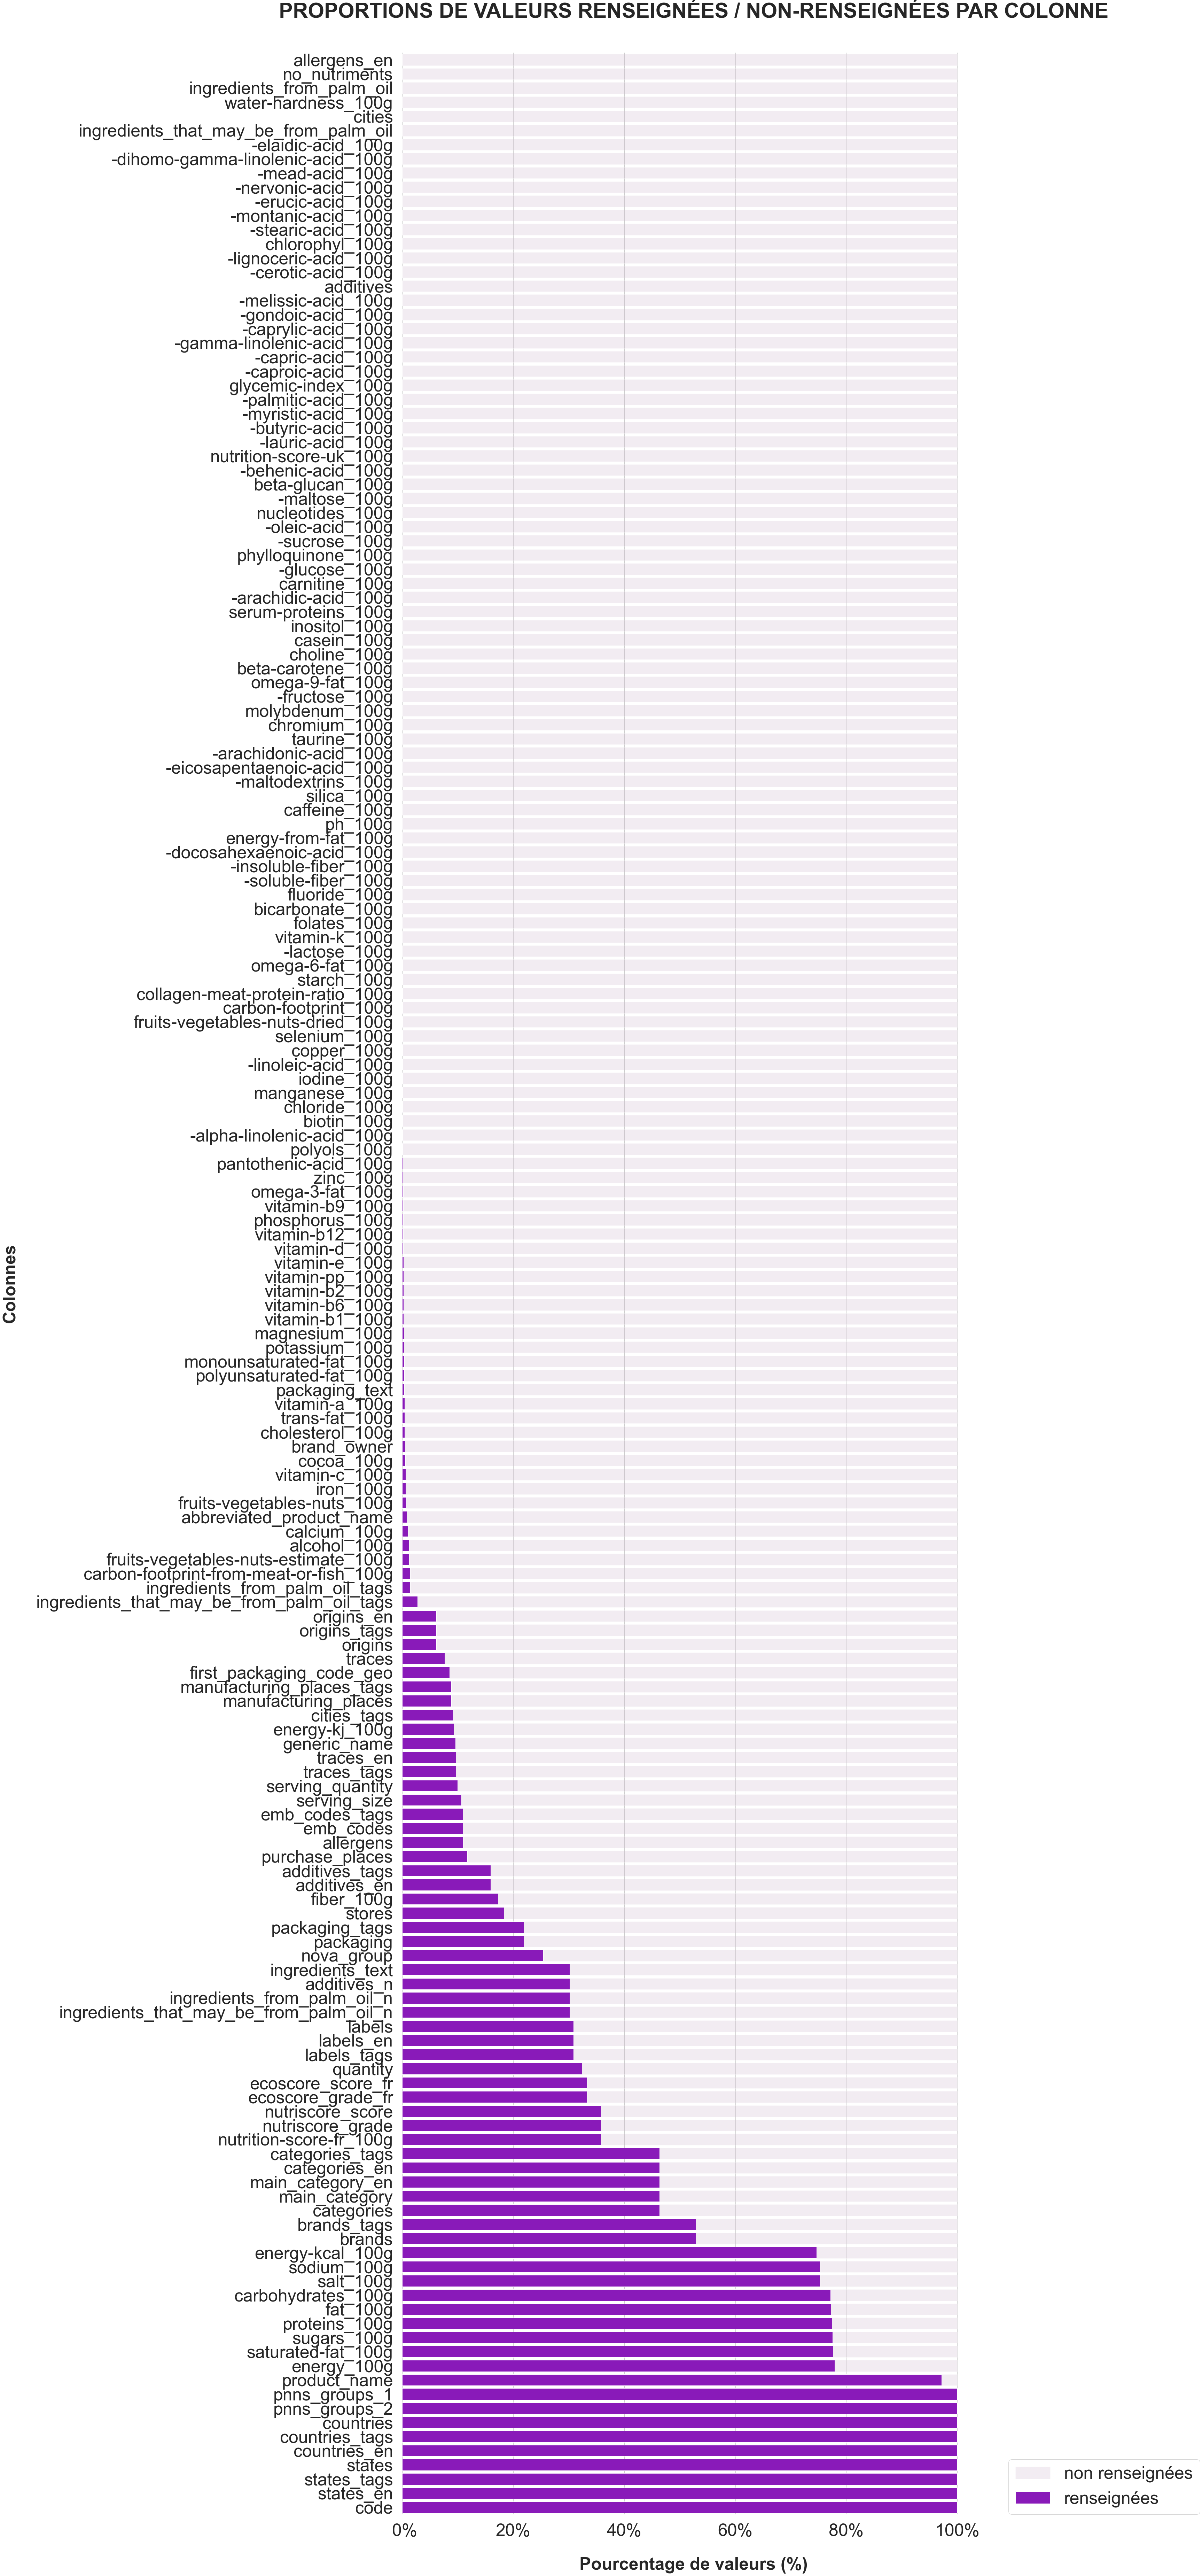

In [10]:
pf.plotTauxRemplissage(data, 30,130)

**Observation** : beaucoup de colonnes contiennent très peu de données (taux de remplissage < 40% pour la plupart des colonnes).

___
#### 2.2.3 Restriction aux colonnes ayant un taux de remplissage >= 25 %

In [11]:
data_selected = data.loc[:, (1-data.isnull().mean()) >=.25]

In [12]:
data_selected.shape

(820915, 40)

<AxesSubplot:>

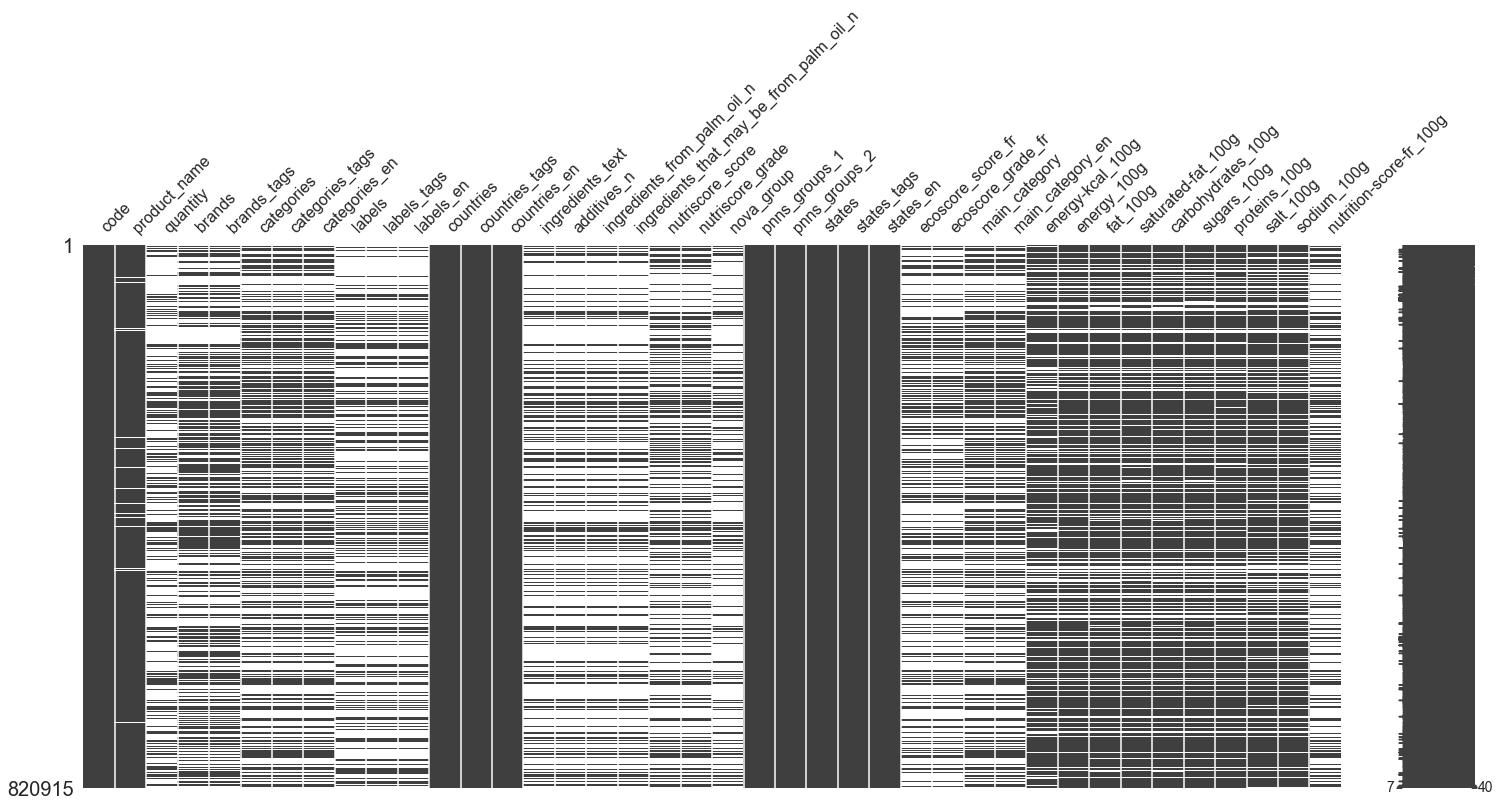

In [13]:
%matplotlib inline
msno.matrix(data_selected)

___
#### 2.2.4 Suppression des colonnes redondantes et des colonnes non pertinentes pour notre choix d'analyse
Pour notre analyse nous avons décidé de nous focaliser sur les colonnes relatives aux :
- groupes alimentaires (PNNS et NOVA)
- valeurs nutritionnelles

Nous allons éliminer:
- les colonnes jugées non pertinentes pour l'analyse : par exemple la quantité, la marque, la catégorie, le pays, le label, les additifs, etc....)
- les colonnes redondantes (celles qui correspondent à des colonnes dont les noms sont différents mais donnent la même information (les colonnes _en ou _tags par exemple)). Aussi, certaines colonnes contiennent les mêmes valeurs que d'autres colonnes (<i>"energy-kcal_100"</i> et <i>"energy_100g"</i>, <i>"nutriscore-score-fr_100g"</i> et <i>"nutriscore_score"</i>).<br>

*Exemple* : La colonne <i>"sodium_100g"</i> peut être calculée directement à partir de la colonne <i>"salt_100g"</i>: 
>sodium_100g = salt_100g / 2.5. 

Il n'est donc pas nécessaire de conserver les deux colonnes.

**Notre objectif**: ne retenir que les colonnes qui sont pertinentes pour la prédiction du nutri-score

In [14]:
# Removing columns that are not relevant to an analysis

data_selected2 = data_selected.drop(columns=['quantity', 'brands', 'brands_tags','categories','categories_tags', 
                                             'categories_en', 'labels_tags', 'labels','labels_en', 'countries',
                                             'countries_tags', 'countries_en', 'ingredients_text','additives_n',
                                             'ingredients_from_palm_oil_n','ingredients_that_may_be_from_palm_oil_n', 
                                             'states', 'states_tags', 'states_en', 'main_category','main_category_en', 
                                             'ecoscore_score_fr','ecoscore_grade_fr','energy-kcal_100g', 'sodium_100g',
                                             'nutrition-score-fr_100g',])

In [15]:
data_selected2.shape

(820915, 14)

### 2.3 Suppression des boissons alcoolisées
Les boissons alcoolisées ne sont pas concernées pour l'apposition du nutri-score. Nous allons restrindre les données aux produits qui ne correspondaents pas aux boissons alcoolisées.

In [36]:
#--------------------------------------------------------------------------
#Restriction des données aux produits sans les boisson alcoolisées
#Et suppression de la colonne 'product_name' 
#(qui ne sera pas une variable utile pour la prédiction du nutriscore)
#--------------------------------------------------------------------------

data_nutriscore = data_selected2[data_selected2["pnns_groups_2"]!="Alcoholic beverages"]\
                  .drop(columns="product_name")

In [17]:
data_nutriscore.shape

(809800, 13)

In [37]:
data_nutriscore.head(3)

,code,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g
0,00000000000000225,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000017,NaN,NaN,NaN,unknown,unknown,1569.0,7.0,3.08,70.1,15.0,7.8,1.4
2,0000000000031,NaN,NaN,NaN,unknown,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

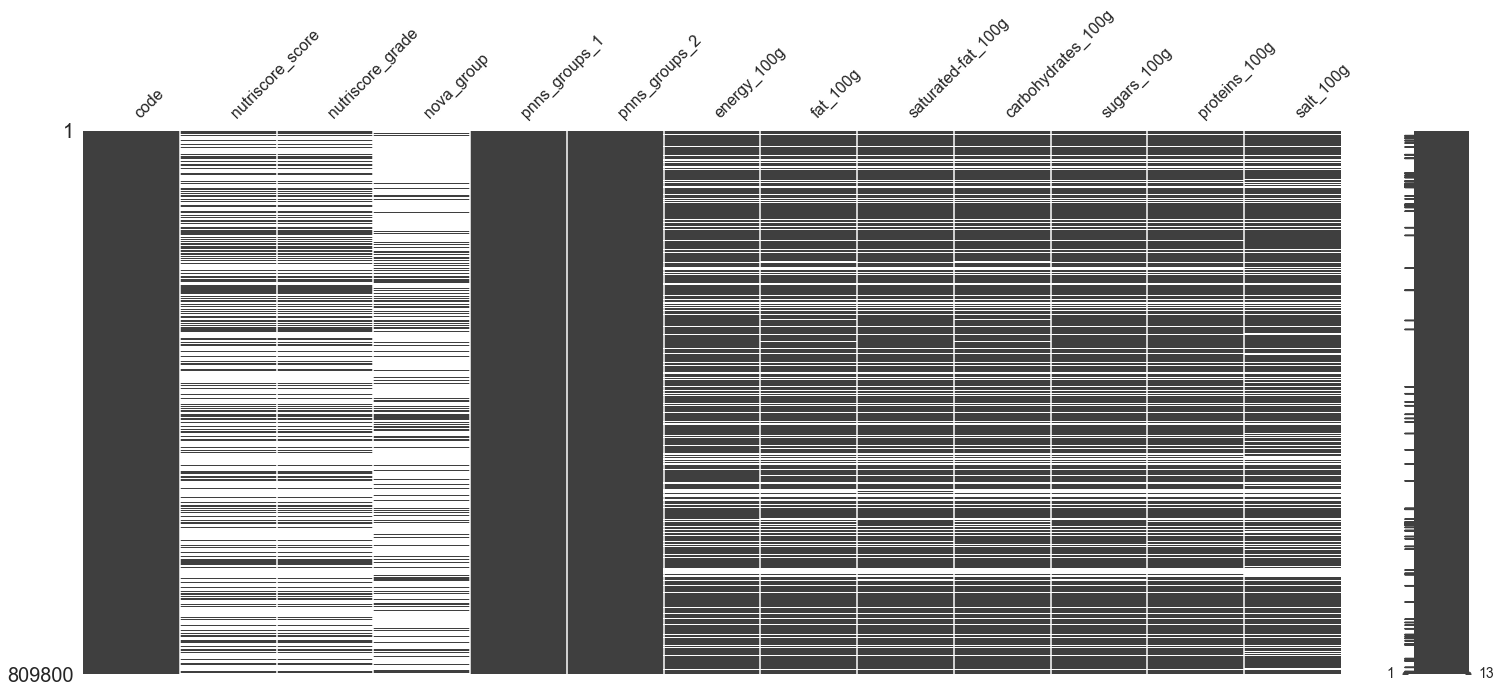

In [38]:
msno.matrix(data_nutriscore)

## 3. NETTOYAGE

- Suppression des lignes et colonnes entièrement vides
- Hamonisation des ortographes
- Traitement des doublons
- Traitement des valeurs manquantes
- Traitement des valeurs aberrantes

### 3.1 Suppression des lignes et colonnes entièrement vides

In [19]:
data_nutriscore = data_nutriscore.dropna(how='all').dropna(how='all', axis=1)

In [20]:
data_nutriscore.shape

(809800, 13)

### 3.2 Hamonisation des ortographes
Certaines lignes contiennent des valeurs de groupes PNNS mal ou différemment orthographiées. Il convient donc d'harmoniser les différentes orthographes des valeurs acceptées pour les groupes PNNS. <br>

In [21]:
# pnns_groups_1
pnns_groups_1 = {"fruits-and-vegetables":"Fruits and vegetables",
                 "sugary-snacks":"Sugary snacks",
                 "salty-snacks": "Salty snacks",
                 "cereals-and-potatoes":"Cereals and potatoes"}

pf.remplacerValeurs(data_nutriscore, "pnns_groups_1", pnns_groups_1)


# pnns_groups_2    
pnns_groups_2 = {"Pizza pies and quiche":"Pizza pies and quiches",
                 "vegetables":"Vegetables",
                 "nuts":"Nuts",
                 "legumes":"Legumes",
                 "fruits":"Fruits",
                 "cereals":"Cereals"}
pf.remplacerValeurs(data_nutriscore, "pnns_groups_2", pnns_groups_2)

### 3.3 Traitement des doublons

In [22]:
data_nutriscore['code'].nunique() #Nombre de valeurs uniques de la colonne code

809740

In [23]:
duplicated_rows = data_nutriscore.loc[data_nutriscore.code.duplicated(), :]
duplicated_rows['code'].nunique() #nombre de code produits dupliqués

60

**Observation** Il y'a 809740 valeurs uniques de la colonne *code* pour 809800 lignes. Ce qui signifie qu'il y'a 60 code produits qui se répètent, c'est-à-dire des informations sur certain produits réparties sur 2 lignes 

Nous allons fusionner les lignes ayant le même code 

In [24]:
#--------------------------------------------------------------------------
#Fusion des doublons (ceux ayant le même code produit)
#Et supprssion de le colonne 'code' 
#(qui ne sera pas une variable utile pour la prédiction du nutriscore)
#--------------------------------------------------------------------------

data_nutriscore = pf.fusionDoublonLignes(data_nutriscore, 'code').drop(columns=['code'])

In [25]:
data_nutriscore.shape

(809740, 12)

### 3.4 Traitement des valeurs manquantes

#### 3.4.1 Variables quantitatives

Pour remplacer les valeurs manquantes des variables quantitative nous allons:
  1. Grouper les données par valeur de groupe PNNS 2
  2. Pour chaque groupe PNNS 2, remplacer les valeurs NaN de la colonne concernée par la valeur **moyenne** de ce groupe sur l'échantillon (groupe PNNS 2)
  
Cette façon de procéder donnera de meilleurs résultats que d'utiliser simplement la valeur moyenne sur l'ensemble du jeu de données.

In [26]:
# Pour les variables quantitatives (except nutriscore_score), 
# remplacer par la valeur mean en groupant par groupe pnn2

quantitative_columns = ['energy_100g', 'fat_100g', 'saturated-fat_100g',
                       'carbohydrates_100g', 'sugars_100g', 'proteins_100g',
                       'salt_100g']


pf.remplacerNaNVarQuantitative(data_nutriscore, quantitative_columns, "pnns_groups_2")

#### 3.4.2 Variables qualitatives

On procèdera ici de façon similaire mais en utilisant plutôt la valeur **modale** pour la colonne pour chaque groupe PNNS 2.

In [27]:
# Pour les variables qualitatives (except nutriscore_grade)
# remplacer par la valeur modale en groupant sur pnns_groups_2

qualitative_columns = ["pnns_groups_1", "nova_group"]

pf.remplacerNaNVarQualitative(data_nutriscore, qualitative_columns, "pnns_groups_2")

In [28]:
# Suppression des données où les valeurs des groupes pnns_1 et pnns_2 sont
# "unknown".Il suffira d'appliquer la condition sur pnns_1 car de par les 
# traitements appliqués précédemment, si la valeur de pnns_groups_1 est 
# "unknown", celle de pnns_2 également.

data_nutriscore = data_nutriscore[(data_nutriscore["pnns_groups_1"]!="unknown") \
                                  & \
                                  (data_nutriscore["pnns_groups_1"].notna())]

In [29]:
data_nutriscore.shape

(324635, 12)

### 3.5 Traitement des valeurs aberrantes

Les valeurs aberrantes ou outliers sont les valeurs situées à plus de 1,5 x Écart interquartile de la borne inférieure Q1 ou de la borne supérieure Q3.<br>

#### 3.5.1 Affichage des boxplots des variables quantitatives

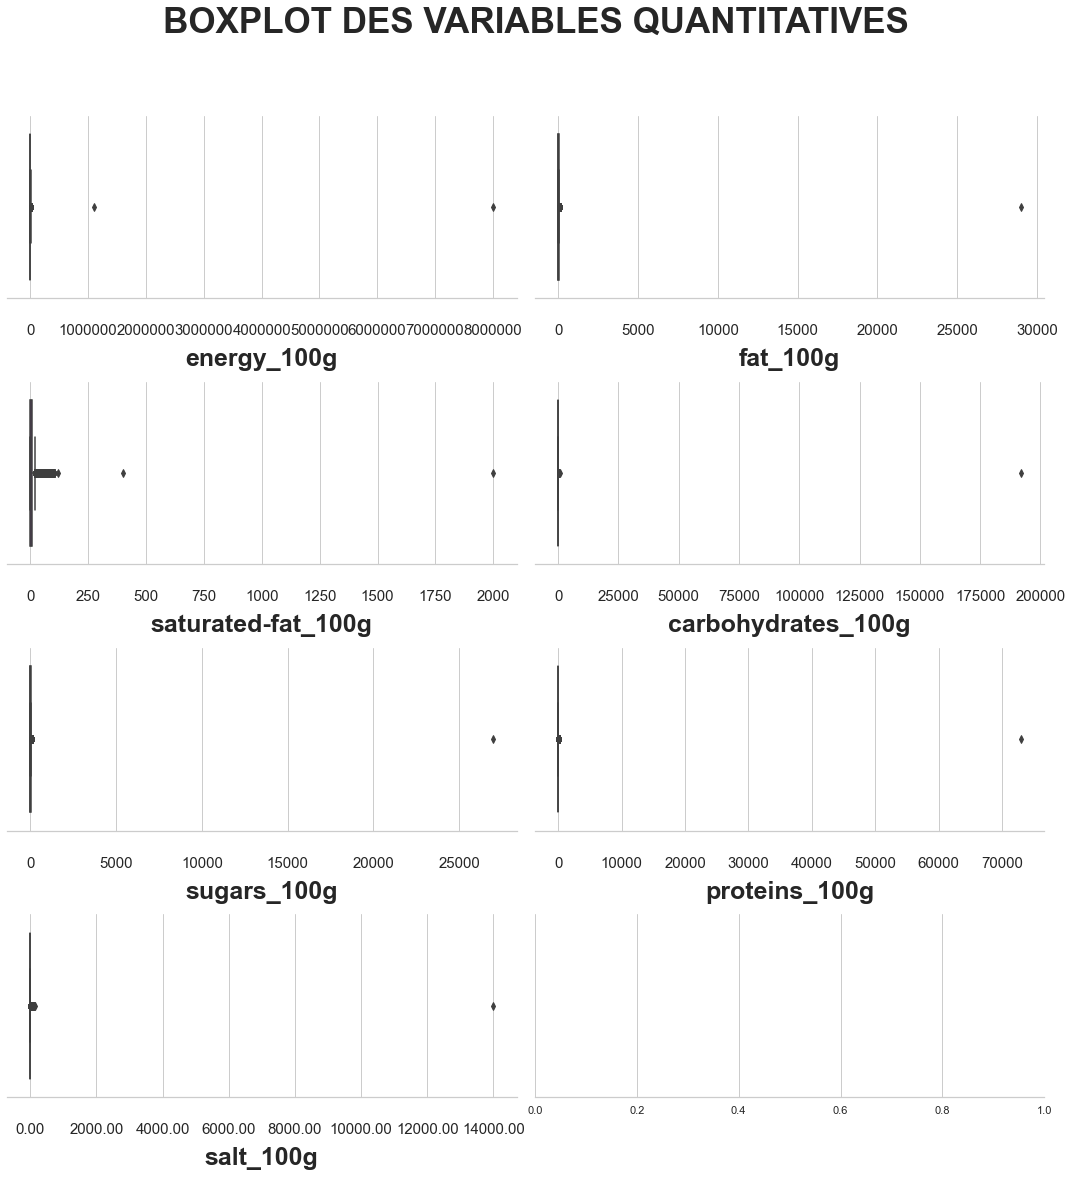

In [30]:
data_quants = data_nutriscore[data_nutriscore.columns.intersection(quantitative_columns)]
pf.plotBoxPlots(data_quants, 15, 15, 4, 2)

#### 3.5.2 Suppresion des valeurs aberrantes

En observant les boîtes à moustache des variables quantitatives précédemment affichés, on constate que ces dernières contiennent un certain nombre de valeurs aberrantes. On va donc les supprimer.
Nous avons utilisé la méthode interquartile range (IQR) pour le faire.

In [32]:
filtered_nutriscore = data_nutriscore.copy().rename(columns={'saturated-fat_100g':'saturated_fat_100g'})

filtered_nutriscore = pf.suppressionOutliers(filtered_nutriscore, data_quants.rename(columns={'saturated-fat_100g':'saturated_fat_100g'}))
    
filtered_nutriscore = filtered_nutriscore.rename(columns={'saturated_fat_100g': 'saturated-fat_100g'})

**Affichage de la matrice de remplissage des colonnes du jeu de donnée nettoyé**

<AxesSubplot:>

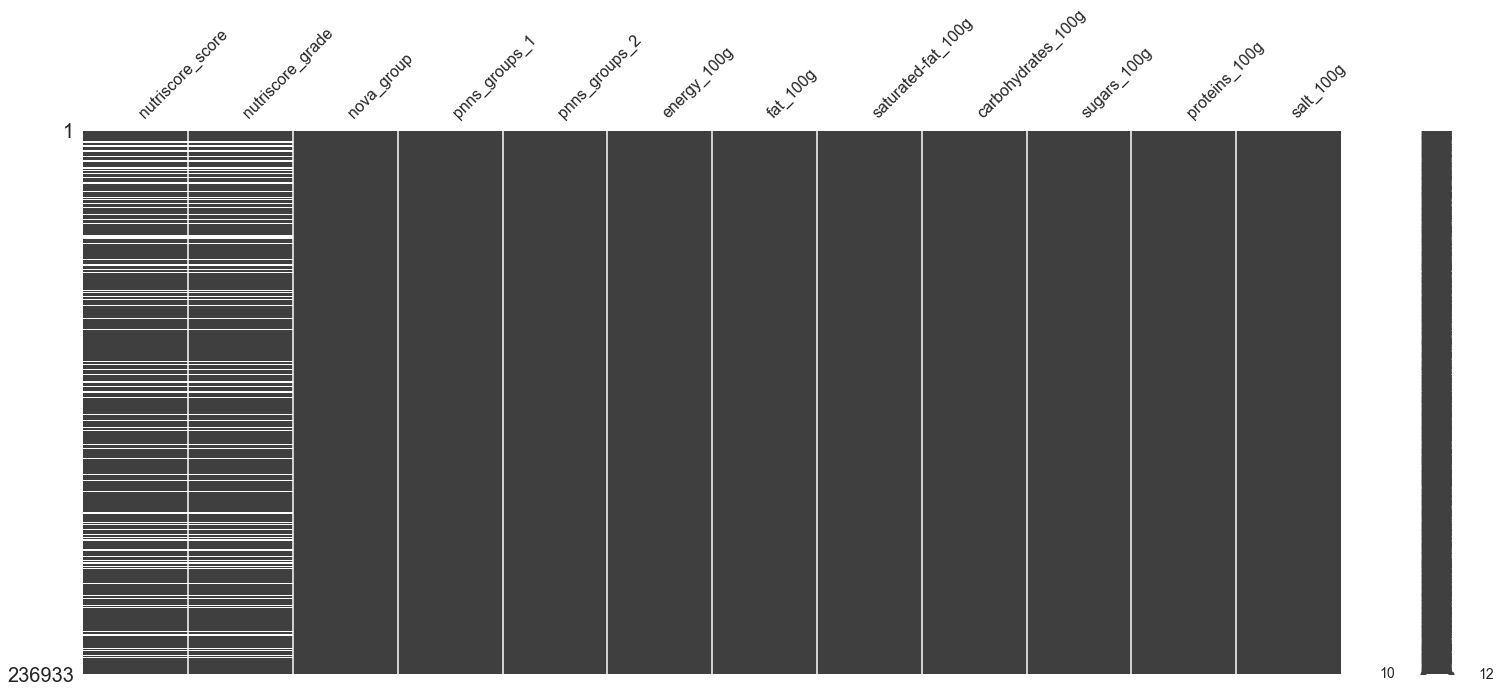

In [33]:
msno.matrix(filtered_nutriscore)

___
## 4. EXPORT DES DONNEES NETTOYEES

In [34]:
filtered_nutriscore.to_csv('data_nutriscore_clean.csv')